# Analysing the history of Olympic Games
### BDA-1904 Kozhakan Symbat

## Introduction

The Olympic Games have been the world's biggest sporting event for over a 100 years. Olympic Games are normally held every 4 years, alternating between the 'Summer' and 'Winter'. Olympics held every two years in the four-year period. Their creation was inspired by the ancient Olympic Games. Most of the countries in the world participate in this event. Our country's team also includes in this data(participates in this event).
-Facts: More than 35,000 medals have been awarded at the Olympics since 1896. The first two Olympiads awarded silver medals and an olive wreath for the winner, and the NOC(National Olympic Committee) retrospectively awarded gold, silver, and bronze to athletes based on their rankings.

In this notebook, we mainly focus on data analysis and visualization:
So, we will analyze the Total count of age, height and weight of athlete using the data obtained by events.
Plotting with categorical variables. It is possible to create a plot using categorical variables. Matplotlib allows us to pass categorical variables directly to many plotting functions.

"Olympic Games" dataset includes all the Games from Athens 1896 to Rio 2016y. Also, this dataset considers some interesting types of events like "Painting and Poetry" and "Nazi Germany in 1936".



## Content

+ Data Descriptions
+ Question block
+ Data Preparation
+ Visualisations
+ Conclusion



## Data description

+ ID - Represent unique number(key) for each athlete. 
+ Name - This info shows us Athlete's name
+ Sex - Identify athletes by genders 'M or F'
+ Age - Period of years
+ Height - Signify athletes height in centimeters
+ Weight - Signify athletes mass in kilograms
+ Team - Team name
+ NOC - National Olympic Committee (NOC) is a national constituent of the worldwide Olympic movement.
+ Games - Year and season
+ Year - Describes period of time
+ Season - Summer or Winter(More detailed description written in Introduction)
+ City - Host city or City where the event will occur
+ Sport - Sport
+ Event - Event(type of activity)
+ Medal - Gold, Silver, Bronze, or NaN

## Research Questions

We'll go over from those questions:

+ Why Olympics from 1912 to 1948 are unique? And what is the medal counts in each team(country)?
+ What is the highest age range of the genders, in terms of ratings - Does age range between genders are exceedingly different?
+ Did the span of results change in Olympic Games in 1936? -Fact: Nazi Germany used the 1936 Olympic Games for propaganda purposes. 
+ The number of athletes which are particpited in each Olympic Events. Why there are huge difference between Seasonal events?
+ Variables of athletes in event. How correlation between athletes variables affect on each axis?


## Data Preparation

##### First of all, we bring all libraries to prepare our data for analysing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import datetime
import csv
from pandas.core.frame import DataFrame
import os
print(os.listdir("..\olympics"))

['.ipynb_checkpoints', 'athlete_events.csv', 'noc_regions.csv', 'Olympic history.ipynb', 'tOlympic history.ipynb']


In [2]:
events = pd.read_csv('../olympics/athlete_events.csv')
regions = pd.read_csv('../olympics/noc_regions.csv')

##### Head()
The head() returns the first n rows for the object based on position. 

In [3]:
events.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


##### Describe()
The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [4]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


##### Info()
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
print('Winter Olympics were held in:',np.array(sorted(events[events['Season']=='Winter']['Year'].unique())))

Winter Olympics were held in: [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006 2010 2014]


In [8]:
print('Summer Olympics were held in:',np.array(sorted(events[events['Season']=='Summer']['Year'].unique())))

Summer Olympics were held in: [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016]


##### Merge()
The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored.

In [9]:
merged = pd.merge(events, regions, on='NOC', how='left')

In [10]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [11]:
events[(events.Medal=='Silver') & (events.Sex =='F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
677,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270704,135379,Erika Zuchold (Barth-),F,25.0,158.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Horse Vault,Silver
270705,135379,Erika Zuchold (Barth-),F,25.0,158.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Uneven Bars,Silver
270939,135489,Anastasiya Valeryevna Zuyeva-Fesikova,F,22.0,182.0,71.0,Russia,RUS,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,Silver
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


In [12]:
event_df = events.groupby('Weight')['Weight'].agg('count')

event_df.sort_values(ascending=True, inplace=True)

event_df.head()

Weight
190.0    1
180.0    1
178.0    1
175.0    1
198.0    1
Name: Weight, dtype: int64

In [13]:
event_wo_df = events[events['Sex'].isnull()]
event_wo_df = event_df.groupby('Weight').size()
event_wo_df = event_df.rename("M")

In [14]:
event_w_df = events[events['Sex'].isnull()]
event_w_df = event_w_df.groupby('Weight').size()
event_w_df = event_w_df.rename("F")

In [15]:
event_by_df = pd.concat([event_wo_df, event_w_df], axis=1).sort_values(by='F', ascending=False)

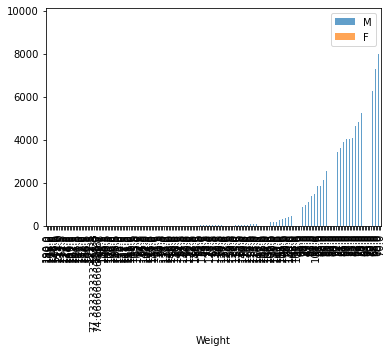

In [16]:

event_by_df.plot(kind='bar',edgecolor='none', alpha = 0.7);

In [17]:
        
weight=events[events.Weight=='weight'] 
height=events[events.Height=='height'] 


C:\Users\kaskyrr\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [18]:
males = events[events.Sex == 'M']
females = events[events.Sex == 'F']
athletes=events[events.Name=='']

## Question block 

### Art Competitions
##### Why Olympics from 1912 to 1948 are unique? And what is the medal counts in each team(country)?

The 'Art Competitions' were included in the Olympics from 1912 to 1948, and included events in 5 disciplines: Architecture, Scupting, Painting, Literature, and Music. Medals were awarded to artists just like any other Olympic competition. The ideal of including sport-inspired art alongside athletic competitions was always part of the vision that Pierre de Coubertin, founder of the modern Olympics, had for the Games.

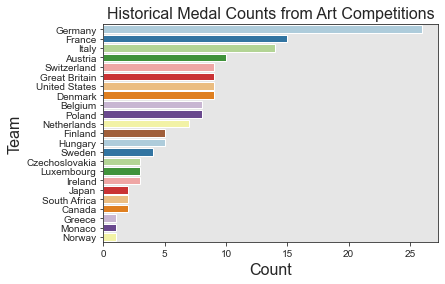

In [19]:
sns.set_style("ticks", {"axes.facecolor": ".9"})
df0 = events[(events['Medal'].notnull()) & (events['Sport'] =='Art Competitions')].groupby('Team').count().reset_index()[['Team','Medal']]
df0 = df0.sort_values(by=['Medal'],ascending=False)
fig = sns.barplot(x='Medal', y='Team',data=df0,palette='Paired')

fig.set_xlabel("Count",fontsize=16)
fig.set_ylabel("Team",fontsize=16)
fig.set_title('Historical Medal Counts from Art Competitions',fontsize=16)
plt.show()

### Age range
##### What is the highest age range of the genders, in terms of ratings - Does age range between genders are exceedingly different?

Most of the people are in the age group of 20 to 25. The age's percentage of males are higher than females. 

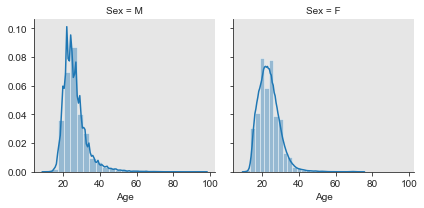

In [20]:
g=sns.FacetGrid(events, col="Sex")
g.map(sns.distplot, "Age", bins=25)
plt.show()

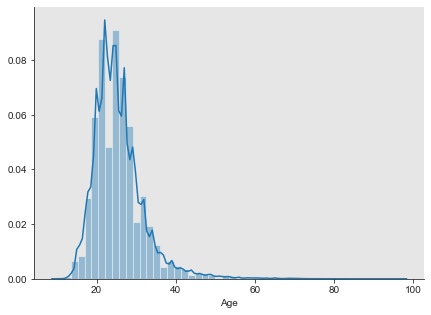

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(events['Age'])

### Nazi Olympics
##### Did the span of results change in Olympic Games in 1936?
 The 1936 Games marked the second and most recent time the National Olympic Committee gathered to vote in a city that was bidding to host those Games. 
- The "PR" worked. So, we can see that from the middle of 1920 and 1940's the count of medals are increased.

Fact: Germany actually applied and won the Olympics before Adolf Hitler rose to power. Germany’s bid to host the 1936 Olympics was accepted in April of 1931. They beat out Barcelona, Spain in their bid. Once Adolf Hitler got into power (1934), he made several changes to the games in an attempt to outdo the 1932 Olympics which had been held in Los Angeles. This was due in part to the fact that he wanted it to be the biggest Olympic games ever.

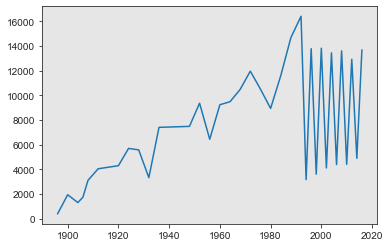

In [22]:
plt.plot(events['Year'].value_counts().sort_index())

In [23]:
df_1936 = events[(events.Year == 1936)].dropna()
df_1936 = df_1936.groupby(['NOC','Medal']).agg({'Medal':'count'})
df_1936 = df_1936.rename(columns = {'Medal':'Count'})
df_1936 = df_1936.reset_index()

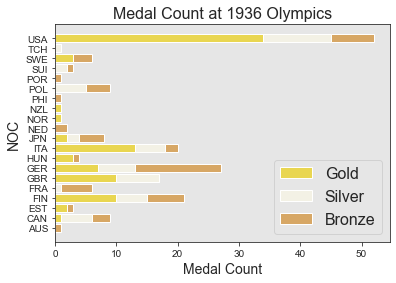

In [24]:
for n in df_1936.NOC.unique():
    if(df_1936[(df_1936.NOC == n)&(df_1936.Medal == 'Silver')]).empty:
        df_1936.loc[-1] = [n, 'Silver', 0]  # adding a row
        df_1936.index = df_1936.index + 1  # shifting index
        df_1936 = df_1936.sort_index()  # sorting by index.
        
for n in df_1936.NOC.unique():
    if(df_1936[(df_1936.NOC == n)&(df_1936.Medal == 'Gold')]).empty:
        df_1936.loc[-1] = [n, 'Gold', 0]  # adding a row
        df_1936.index = df_1936.index + 1  # shifting index
        df_1936 = df_1936.sort_index()  # sorting by index.
        
for n in df_1936.NOC.unique():
    if(df_1936[(df_1936.NOC == n)&(df_1936.Medal == 'Bronze')]).empty:
        df_1936.loc[-1] = [n, 'Bronze', 0]  # adding a row
        df_1936.index = df_1936.index + 1  # shifting index
        df_1936 = df_1936.sort_index()  # sorting by index.
        
#Sort Values in Order of NOC        
df_1936 = df_1936.sort_values(by='NOC')

#Setting width and left parameter for stacked barplot
C_Gold =df_1936[df_1936.Medal=='Gold']['Count']
C_Silver = df_1936[df_1936.Medal=='Silver']['Count']
C_Bronze = df_1936[df_1936.Medal=='Bronze']['Count']
B_bottom = [sum(x) for x in zip(df_1936[df_1936.Medal=='Gold']['Count'].tolist(), df_1936[df_1936.Medal=='Silver']['Count'].tolist())]

#creating stacked bar plot
plt.barh(y=(df_1936[df_1936.Medal=='Gold']['NOC']), width=C_Gold,label='Gold',color='#E9D651')
plt.barh(y=df_1936[df_1936.Medal=='Silver']['NOC'], width=C_Silver, left=C_Gold,label='Silver',color='#F3F1E5')
plt.barh(y=df_1936[df_1936.Medal=='Bronze']['NOC'], width=C_Bronze,left=B_bottom,label='Bronze',color='#D7A765')

#Manipulating Labels
plt.legend(fontsize=16)
plt.xlabel('Medal Count', fontsize=14)
plt.ylabel('NOC', fontsize=14)
plt.title('Medal Count at 1936 Olympics',fontsize=16)
plt.show()

### Athletes in each Olympic Games
##### The number of athletes which are particpited in each Olympic Events. Why there are huge difference between Seasonal events?
 According to plot we can say that Summer Season event has more athletes than Winter Season.Its because of type of sport that held in each Seasonal Events. 

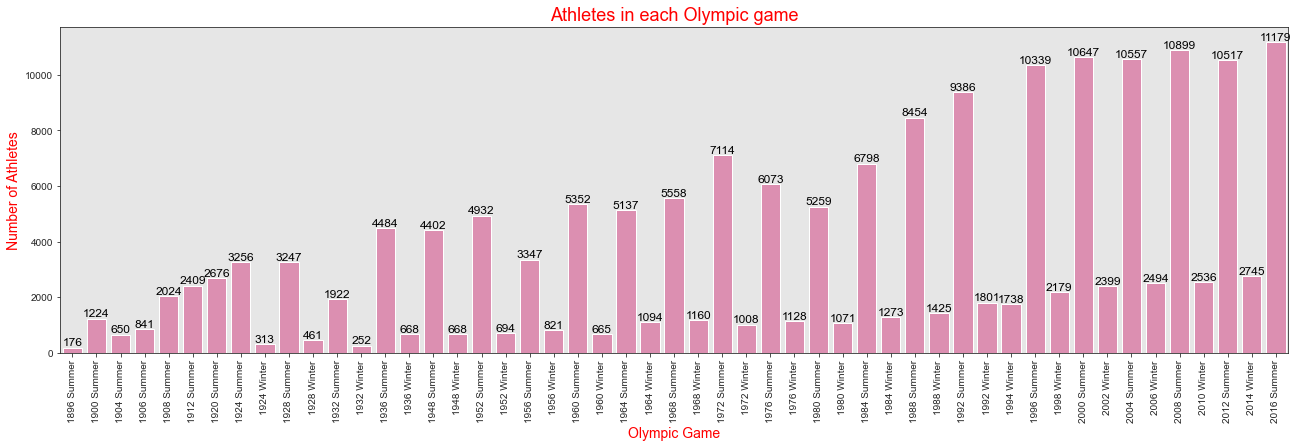

In [25]:
games_athletes = events.pivot_table(events, index=['Games'], aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="#E982AF")
a.set_xticklabels(labels=games_athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="r")
ax.set_ylabel('Number of Athletes', size=14, color="r")
ax.set_title('Athletes in each Olympic game', size=18, color="r")

plt.show()

### Heatmap
+ How heatmap works? What is the correlation between variables in event?

Each square shows the correlation between the variables on each axis. Correlation ranges from -0 to +1. Values closer to minus zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated. They are as one increases so does the other and the closer to 1 than this relationship is stronger . A correlation closer to 0 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/light beige because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the smaller the number and darker the color. It means the correlation between the two variables are lower. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

<Figure size 1800x1440 with 0 Axes>

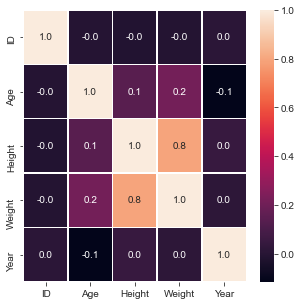

In [26]:
plt.figure(figsize=(25,20))
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(events.corr(),annot=True,linewidths=.5,fmt=".1f")
plt.show()

#### Medals won by Kazakhstan

Text(0.5, 1.0, 'Medals won by Kazakhstan per year')

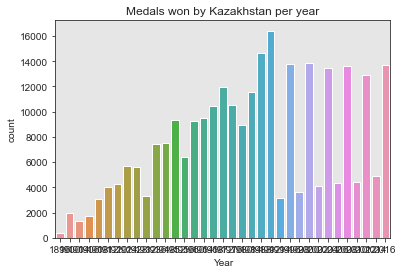

In [27]:
medals = events[events['Team']=='Kazakhstan']
sns.countplot(x='Year',data=events)
plt.title("Medals won by Kazakhstan per year")

## Conclusion

To conclude, This dataset provides a big opportunity to ask questions about how the Olympics have evolved over time. How number of athletes depends of Seasonal events. Also, we via including questions about the participation and performance of women, different nations, and different sports and events can understand and visualize them by using learned/explained topics. 

## References(Links)
This data was scraped from (source: www.sports-reference.com) by Randi H Griffin,PH.

+ https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
+ https://olympstats.com/2016/08/21/the-olymadmen-and-olympstats-and-sports-reference/